# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" + "&appid=" + weather_api_key
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    # except Exception as E:
    #     print(E)          
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | remire-montjoly
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | tazacorte
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | rongelap
Processing Record 14 of Set 1 | rattvik
City not found. Skipping...
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | ketchikan
Processing Record 17 of Set 1 | pandan
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | ukwa
Processing Record 21 of Set 1 | nampula
Processing Record 22 of Set 1 | el gran

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.50,80,12,4.23,GS,1683570832
1,tiksi,71.6872,128.8694,-12.88,90,100,4.18,RU,1683570833
2,san patricio,28.0170,-97.5169,31.92,57,71,7.31,US,1683570833
3,yellowknife,62.4560,-114.3525,11.29,66,75,3.60,CA,1683570834
4,adamstown,-25.0660,-130.1015,21.78,55,100,7.32,PN,1683570834


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.50,80,12,4.23,GS,1683570832
1,tiksi,71.6872,128.8694,-12.88,90,100,4.18,RU,1683570833
2,san patricio,28.0170,-97.5169,31.92,57,71,7.31,US,1683570833
3,yellowknife,62.4560,-114.3525,11.29,66,75,3.60,CA,1683570834
4,adamstown,-25.0660,-130.1015,21.78,55,100,7.32,PN,1683570834


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

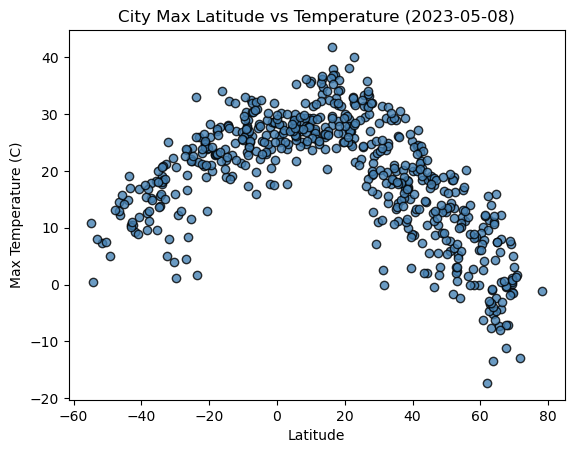

In [30]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df['Lat']
temps = city_data_df['Max Temp']

plot1 = plt.scatter(lats, temps, facecolors="steelblue", alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature (2023-05-08)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

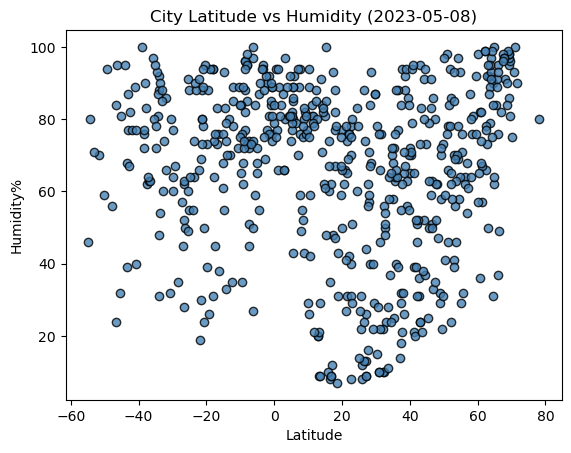

In [31]:
# Build scatter plot for latitude vs. humidity
lats = city_data_df['Lat']
humidity = city_data_df['Humidity']

plot1 = plt.scatter(lats, humidity, facecolors="steelblue", alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
plt.title('City Latitude vs Humidity (2023-05-08)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

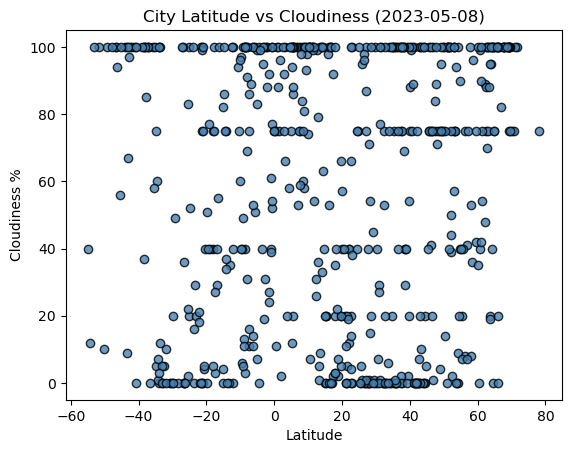

In [32]:
# Build scatter plot for latitude vs. cloudiness
lats = city_data_df['Lat']
clouds = city_data_df['Cloudiness']

plot1 = plt.scatter(lats, clouds, facecolors="steelblue", alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs Cloudiness (2023-05-08)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

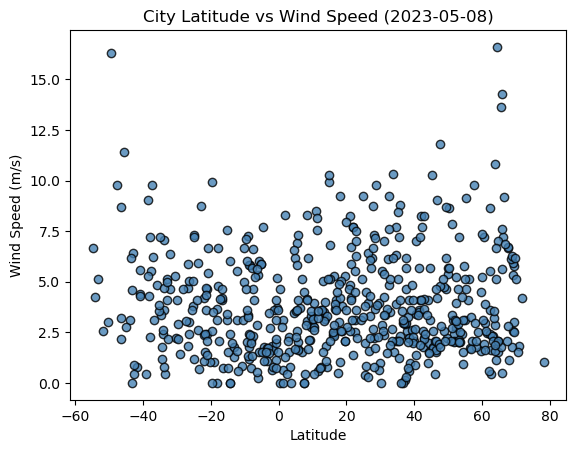

In [33]:
# Build the scatter plots for latitude vs. wind speed
lats = city_data_df['Lat']
speed = city_data_df['Wind Speed']

plot1 = plt.scatter(lats, speed, facecolors="steelblue", alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2023-05-08)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
nlvt_slope, nlvt_int, nlvt_r, nlvt_p, nlvt_std_err = st.linregress(nlvt_lats, nlvt_temps)
nlvt_fit = lvt_slope * nlvt_lat + lvt_int

nlvt_plot = plt.scatter(lats,temps, marker="o", facecolors="steelblue")
plt.plot(nlvt_lats, nlvt_fit,"--", color="red")

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,128.8694,-12.88,90,100,4.18,RU,1683570833
2,san patricio,28.0170,-97.5169,31.92,57,71,7.31,US,1683570833
3,yellowknife,62.4560,-114.3525,11.29,66,75,3.60,CA,1683570834
5,remire-montjoly,4.9167,-52.2667,29.02,74,75,6.17,GF,1683570834
6,albany,42.6001,-73.9662,21.68,36,7,1.79,US,1683570668


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.50,80,12,4.23,GS,1683570832
4,adamstown,-25.0660,-130.1015,21.78,55,100,7.32,PN,1683570834
7,papatowai,-46.5619,169.4708,14.51,84,100,3.19,NZ,1683570835
10,ushuaia,-54.8000,-68.3000,10.81,46,40,6.69,AR,1683570779
11,port elizabeth,-33.9180,25.5701,19.16,92,0,3.60,ZA,1683570836


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
nlvt_plot = plt.scatter(lats,temps, marker="o", facecolors="steelblue")
plt.plot(nlvt_lats, nlvt_fit,"--", color="red")

The r-value is: 0.7161472181434118


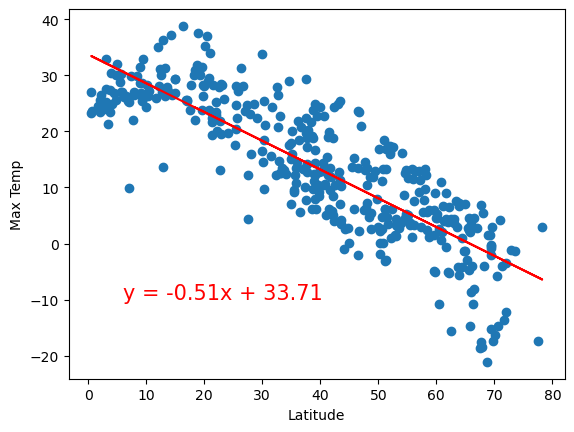

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


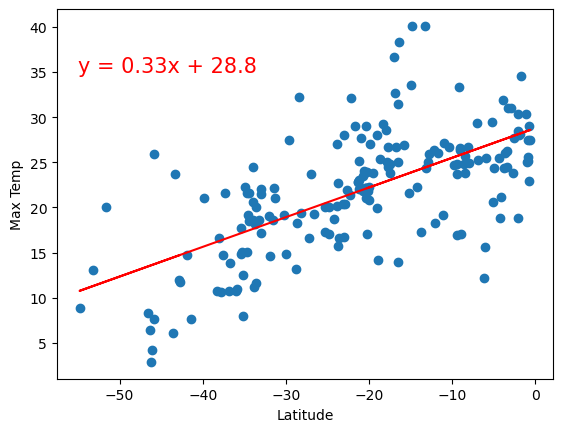

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


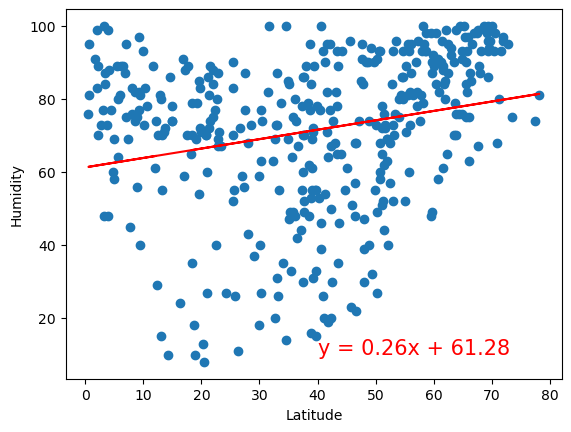

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


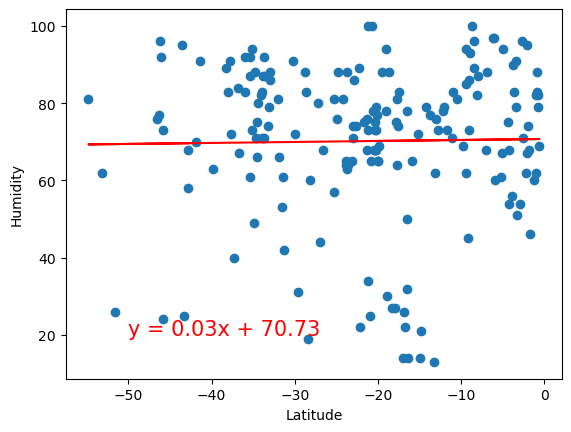

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


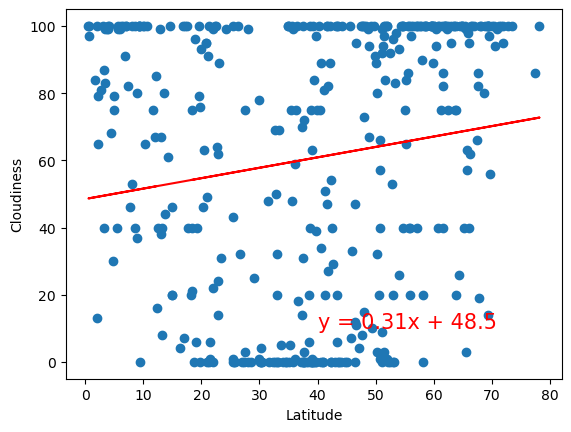

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


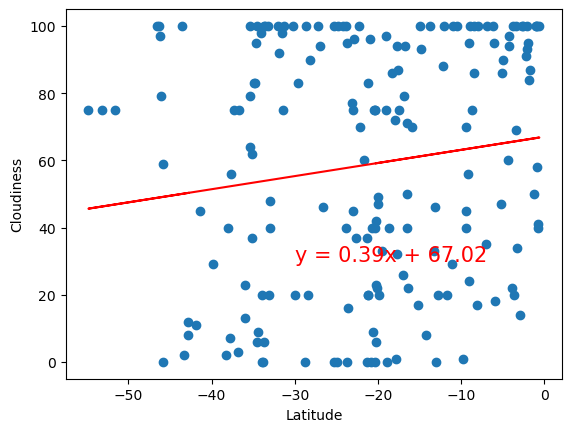

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


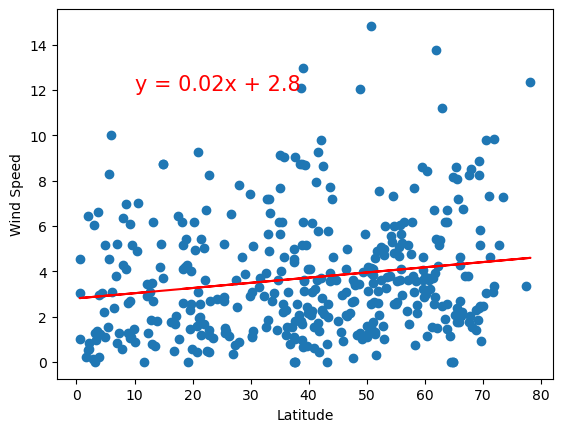

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


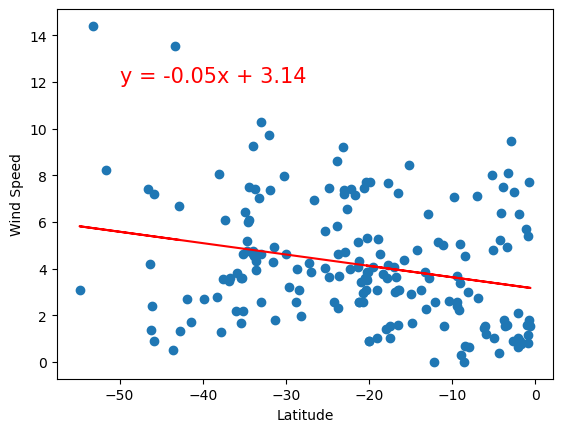

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE